# Predict Housing Price with Multiple Linear Regression

## Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [50]:
# for data processing
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Load the dataset

In [51]:
#Mount drive to access the csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
#Load Data
df = pd.read_csv('/content/drive/MyDrive/Great Learning/3 Supervised Learning - Foundation/Week 1: Intro to Supervised Learning/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Get the info regarding column datatypes

In [53]:
#Information about column types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [54]:
#Statistical description
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

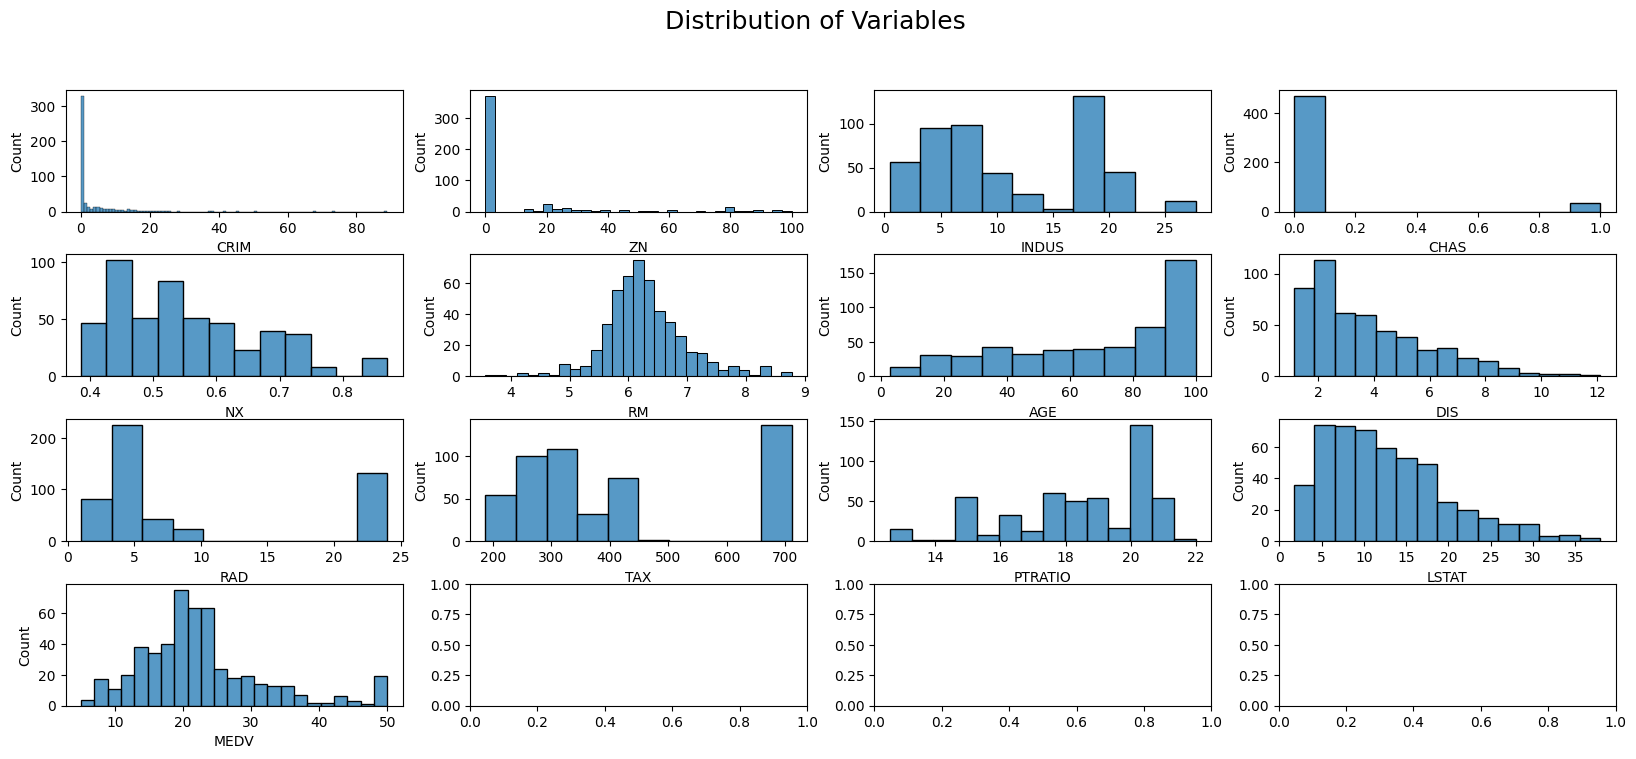

In [55]:
#Sets up the Figure
fig_dist, axs_dist = plt.subplots(4,4)

#Changes fig size and spacing
fig_dist.set_figwidth(20)
fig_dist.set_figheight(8)
plt.subplots_adjust(hspace = 0.35)

#Creates each plot
sns.histplot(data = df, x = 'CRIM',    ax = axs_dist[0,0])
sns.histplot(data = df, x = 'ZN',      ax = axs_dist[0,1])
sns.histplot(data = df, x = 'INDUS',   ax = axs_dist[0,2])
sns.histplot(data = df, x = 'CHAS',    ax = axs_dist[0,3])
sns.histplot(data = df, x = 'NX',      ax = axs_dist[1,0])
sns.histplot(data = df, x = 'RM',      ax = axs_dist[1,1])
sns.histplot(data = df, x = 'AGE',     ax = axs_dist[1,2])
sns.histplot(data = df, x = 'DIS',     ax = axs_dist[1,3])
sns.histplot(data = df, x = 'RAD',     ax = axs_dist[2,0])
sns.histplot(data = df, x = 'TAX',     ax = axs_dist[2,1])
sns.histplot(data = df, x = 'PTRATIO', ax = axs_dist[2,2])
sns.histplot(data = df, x = 'LSTAT',   ax = axs_dist[2,3])
sns.histplot(data = df, x = 'MEDV',    ax = axs_dist[3,0])

#Creates a title for the figure
fig_dist.suptitle('Distribution of Variables', fontsize = 18);

**Observations:**

---
* CRIM, DIS and LSTAT are all skewed right.
* ZN has a mode near 0, but has a small amount of values scattered between 20 and 100.  There is a gap between 5 and 15.
* INDUS seems to be bimodal with modes around 5 and 18.
* CHAS has most of its values between 0 and 0.1, but has small group of outliers at near 1.
* NX has a slight right skew.
* RM and MEDV are both approximatily normal.
* AGE and PTRATIO are both left skewed
* RAD looks approximately normal between 0 and 10 but has a bunch of outliers at about 23.
* Most values in TAX are between 180 and 400.  There is a gap between 500 and 650, and then a large group around 700.


**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

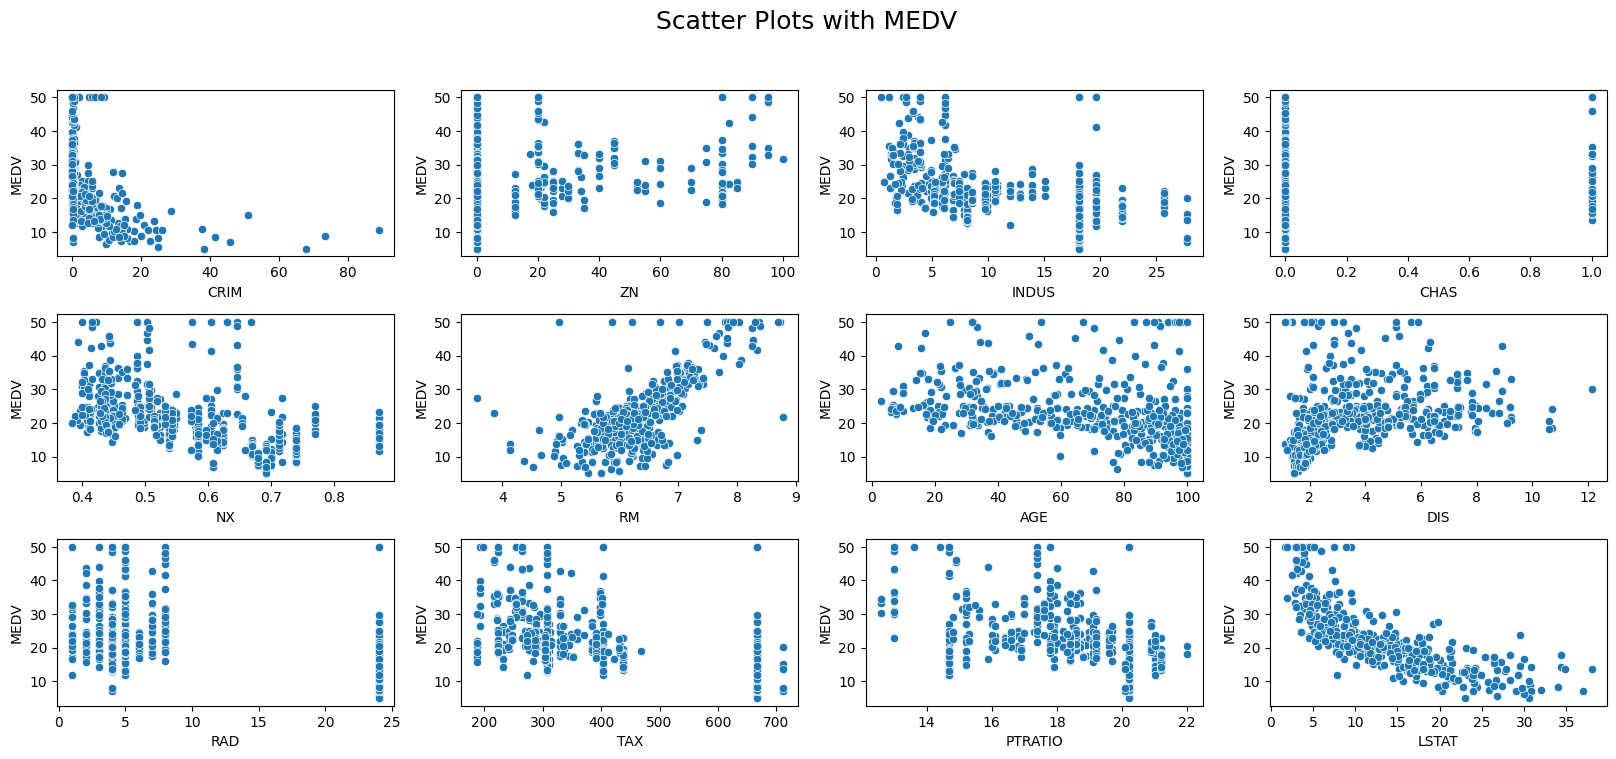

In [56]:
#Sets up the figure
fig_scat, axs_scat = plt.subplots(3,4)

#Adjust size and spacing of the figure
fig_scat.set_figwidth(20)
fig_scat.set_figheight(8)
plt.subplots_adjust(hspace = 0.35)

#Creates each plot
sns.scatterplot(data = df, x = 'CRIM',    y = 'MEDV', ax = axs_scat[0,0])
sns.scatterplot(data = df, x = 'ZN',      y = 'MEDV', ax = axs_scat[0,1])
sns.scatterplot(data = df, x = 'INDUS',   y = 'MEDV', ax = axs_scat[0,2])
sns.scatterplot(data = df, x = 'CHAS',    y = 'MEDV', ax = axs_scat[0,3])
sns.scatterplot(data = df, x = 'NX',      y = 'MEDV', ax = axs_scat[1,0])
sns.scatterplot(data = df, x = 'RM',      y = 'MEDV', ax = axs_scat[1,1])
sns.scatterplot(data = df, x = 'AGE',     y = 'MEDV', ax = axs_scat[1,2])
sns.scatterplot(data = df, x = 'DIS',     y = 'MEDV', ax = axs_scat[1,3])
sns.scatterplot(data = df, x = 'RAD',     y = 'MEDV', ax = axs_scat[2,0])
sns.scatterplot(data = df, x = 'TAX',     y = 'MEDV', ax = axs_scat[2,1])
sns.scatterplot(data = df, x = 'PTRATIO', y = 'MEDV', ax = axs_scat[2,2])
sns.scatterplot(data = df, x = 'LSTAT',   y = 'MEDV', ax = axs_scat[2,3])

#Titles figure
fig_scat.suptitle('Scatter Plots with MEDV', fontsize = 18);

**Observations:**

---
* The majority of the points in CRIM are less than 20. The points at 0 seem to be distributed over the whole range of values, but there is a negative correlation.
* ZN and MEDV seems to have a weak positive correlation.  The points at 0 span and entire range of MEDV values.
* INDUS has a negative correlation.
* Chas values of 0 have more points and the MEDV values are spreadout slightly more, but Chas values of 1 have a similar MEDV distribution

**Plot the correlation heatmap and list your observations.**

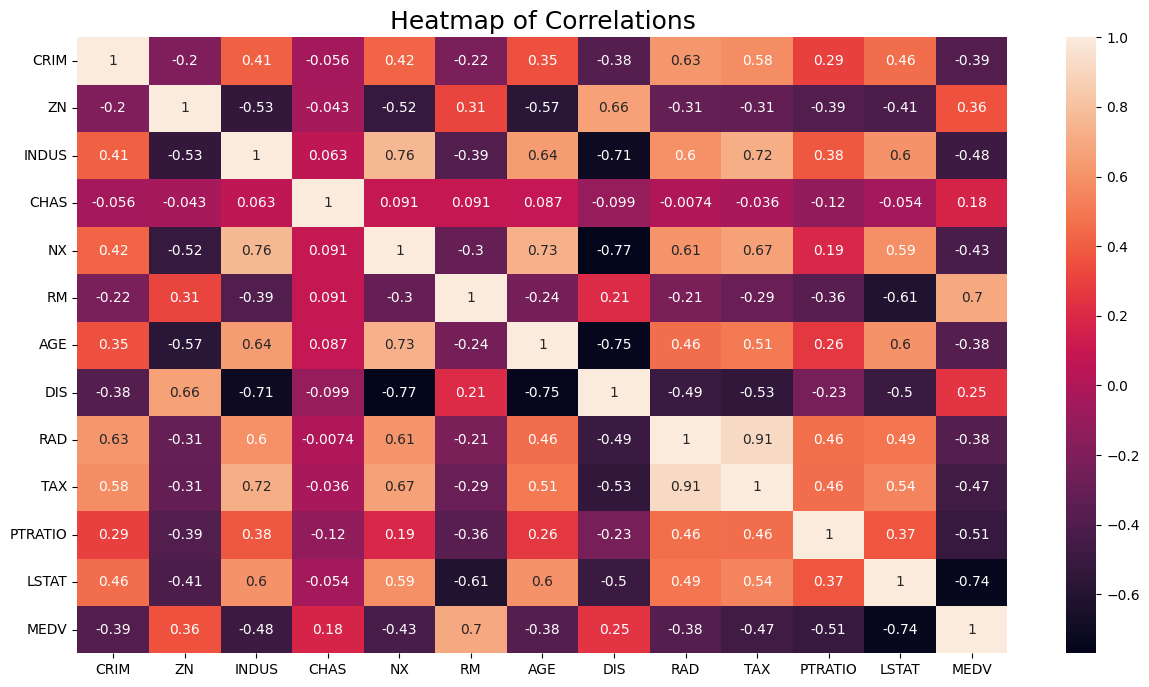

In [57]:
#Sets figure size
plt.figure(figsize = (15,8))

#Creates plot
sns.heatmap(data = df.corr(), annot = True)

#Titles plot
plt.title('Heatmap of Correlations', fontsize = 18);

**Observations:**

---
*The following are the variables with the strongest correlations with MEDV in order:
> * LSTAT (-0.74), RM (0.7), PTRATIO (-0.51), INDUS (-0.48), TAX (-0.47), and NX (-0.43)
* LSTAT is strongly related to RM, NX and INDUS.
* INDUS is strongly related to NX, TAX, DIS, AGE, LSTAT, RAD, and ZN

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [58]:
#Creates independant and dependant variables
X = df.drop('MEDV', axis = 1)
y = df.MEDV

#Adds a constant so our model can adjust the y-intercept
X = sm.add_constant(X)

#Splits the training data into train and valid groups
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 13)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [59]:
#Creates a linear regression model
olsmod = sm.OLS(y_train, X_train, hasconst = True)

#Fits the model to the data
olsres = olsmod.fit()

**Get the value of the coefficient of determination.**

In [60]:
#Prints the information about the fit
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     80.00
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.05e-91
Time:                        14:08:08   Log-Likelihood:                -1051.7
No. Observations:                 354   AIC:                             2129.
Df Residuals:                     341   BIC:                             2180.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7823      6.023      6.771      0.0

**Get the predictions on test set**

In [61]:
#Predictions on training data
y_training_pred = olsres.predict(X_train)

#Prediction on valid data
y_pred = olsres.predict(X_valid)

df['PREDICTIONS'] = y_pred.append(y_training_pred)
df['RESIDUAL'] = df.PREDICTIONS - df.MEDV

df

<ipython-input-61-661e2c86c415>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['PREDICTIONS'] = y_pred.append(y_training_pred)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,PREDICTIONS,RESIDUAL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,30.323319,6.323319
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,24.740745,3.140745
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,30.272262,-4.427738
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,28.527734,-4.872266
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,27.626631,-8.573369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,23.472002,1.072002
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,22.592039,1.992039
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,27.832697,3.932697
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,26.367772,4.367772


**Calculate MSE for training set**

In [62]:
mean_squared_error(y_train, y_training_pred)

22.28079524374183

**Calculate MSE for test set**

In [63]:
mean_squared_error(y_valid, y_pred)

24.413962668861714

**Get the RMSE on training set**

In [64]:
mean_squared_error(y_train, y_training_pred, squared = False)

4.720253726627609

**Get the RMSE on test set**

In [68]:
error = round(mean_squared_error(y_valid, y_pred, squared = False), 5)

print(f"The root-mean-squared-error for our model on the testing data is {error}.")

The root-mean-squared-error for our model on the testing data is 4.94105
